# Pre-Class 6.2

## Exercise 16.2

In [21]:
import matplotlib
from pylab import *
import networkx as nx
import random as rd
import numpy as np
plt.style.use('ggplot')

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def check_consensus():
    global g
    counter = 0
    for i in g.nodes:
        counter += g.node[i]['state']
    if (counter == 0) or (counter == len(g)):
        return True
    else:
        return False

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


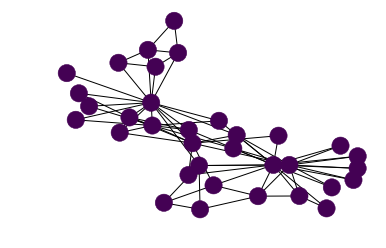

In [19]:
trials_list = []
n_trials = 100

for i in range(n_trials):
    initialize()
    n_steps = 0
    while not check_consensus():
        update()
        n_steps += 1
    trials_list.append(n_steps)

In [24]:
print("For {n} trials, the mean is {mean} and the 95% CI is ({CI_bottom}, {CI_top})".format(n=n_trials, 
                                                                                            mean=np.mean(trials_list), 
                                                                                            CI_bottom=round(np.percentile(trials_list, 2.5), 2), 
                                                                                            CI_top=round(np.percentile(trials_list, 97.5), 2)))


For 100 trials, the mean is 663.38 and the 95% CI is (138.78, 1728.65)


## Exercise 16.3

In [114]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update_original():
    # pull
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def update_reversed():
    # push
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def update_edge_based():
    # push
    global g
    chosen_edge = rd.choice(list(g.edges))
    rand_ind = [0, 1]
    rd.shuffle(rand_ind)
    g.nodes[chosen_edge[rand_ind[0]]]['state'] = g.nodes[chosen_edge[rand_ind[1]]]['state']
    
def check_consensus():
    global g
    counter = 0
    for i in g.nodes:
        counter += g.node[i]['state']
    if (counter == 0) or (counter == len(g)):
        return True
    else:
        return False

In [118]:
# Test the original update
trials_list_original = []
n_trials = 100

for i in range(n_trials):
    initialize()
    n_steps = 0
    while not check_consensus():
        update_original()
        n_steps += 1
    trials_list_original.append(n_steps)

In [119]:
# Test the reversed update
trials_list_reversed = []
n_trials = 100

for i in range(n_trials):
    initialize()
    n_steps = 0
    while not check_consensus():
        update_reversed()
        n_steps += 1
    trials_list_reversed.append(n_steps)

In [117]:
# Test the edge-based update
trials_list_edge_based = []
n_trials = 100

for i in range(n_trials):
    initialize()
    n_steps = 0
    while not check_consensus():
        update_edge_based()
        n_steps += 1
    trials_list_edge_based.append(n_steps)

In [122]:
print("For {n} trials:".format(n=n_trials))
print("Original: the mean is {mean} and the 95% CI is ({CI_bottom}, {CI_top})".format(n=n_trials, 
                                                                                            mean=np.mean(trials_list_original), 
                                                                                            CI_bottom=round(np.percentile(trials_list_original, 2.5), 2), 
                                                                                            CI_top=round(np.percentile(trials_list_original, 97.5), 2)))
print("Reversed: the mean is {mean} and the 95% CI is ({CI_bottom}, {CI_top})".format(n=n_trials, 
                                                                                            mean=np.mean(trials_list_reversed), 
                                                                                            CI_bottom=round(np.percentile(trials_list_reversed, 2.5), 2), 
                                                                                            CI_top=round(np.percentile(trials_list_reversed, 97.5), 2)))
print("Edge-based: the mean is {mean} and the 95% CI is ({CI_bottom}, {CI_top})".format(n=n_trials, 
                                                                                            mean=np.mean(trials_list_edge_based), 
                                                                                            CI_bottom=round(np.percentile(trials_list_edge_based, 2.5), 2), 
                                                                                            CI_top=round(np.percentile(trials_list_edge_based, 97.5), 2)))


For 100 trials:
Original: the mean is 671.87 and the 95% CI is (93.7, 2368.8)
Reversed: the mean is 3633.44 and the 95% CI is (751.9, 9438.75)
Edge-based: the mean is 1158.15 and the 95% CI is (153.05, 4003.3)


No handles with labels found to put in legend.


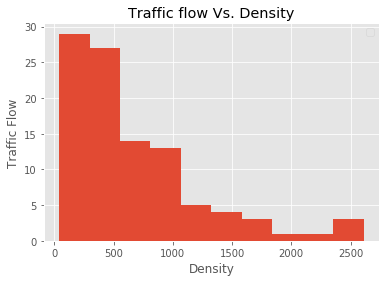

In [123]:
# plt.plot(initial_density, flows, label="mean")
plt.hist(trials_list_original)
plt.title("Traffic flow Vs. Density")
plt.xlabel("Density")
plt.ylabel("Traffic Flow")
plt.legend()
plt.show()